# Problem

An alternative image normalization to histogram equalization is a quotient image. A quotient image is obtained by dividing the image with a blurred version I/(I * G). Implement this and try it on some sample images.

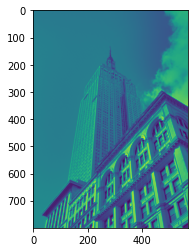

In [1]:
# So that local modules can be imported:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import imtools
from lib.plot_gallery import *

from PIL import Image
from numpy import *
from scipy.ndimage import filters
from matplotlib import pyplot

SIGMA = 100
EMPIRE_PATH = '../example-images/empire.jpg'

# plt.set_cmap('gray')

im = array(Image.open(EMPIRE_PATH).convert('L'), 'f')
im_quot = im / imtools.gaussian_blur(im,SIGMA)
quo_eq_im = interp(im_quot, [im_quot.min(), im_quot.max()], [0, 255]).astype('uint8')
# quo_eq_im = im_quot

plt.imshow(quo_eq_im)

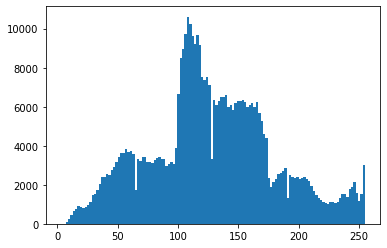

In [2]:
plt.figure() 
plt.hist(im.flatten(),128) 
plt.show()

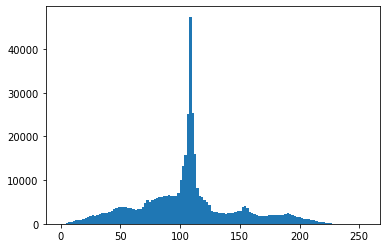

In [3]:
plt.figure() 
plt.hist(quo_eq_im.flatten(),128) 
plt.show()

## Color Image

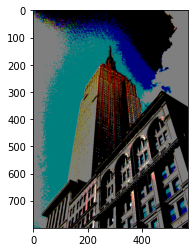

In [4]:
# Note that this is a lot less dramatic:
# rgb_im = Image.open('../example-images/pets/salvador_sleeping.jpg')
# rgb_im = imtools.resize(salvador_rgb, 0.25)

rgb_im = Image.open(EMPIRE_PATH)

def image_quotient(im):
    im_quot = (im / imtools.gaussian_blur(im,SIGMA)).astype('uint8')
    (im_quot.min(), im_quot.max(), im_quot.dtype)
    quo_eq_im = interp(im_quot.flatten(), [im_quot.min(), im_quot.max()], [0, 255]).astype('uint8')
    return quo_eq_im.reshape(im.shape)

im = array(rgb_im)
im_quot = image_quotient(im)
plt.imshow(im_quot)


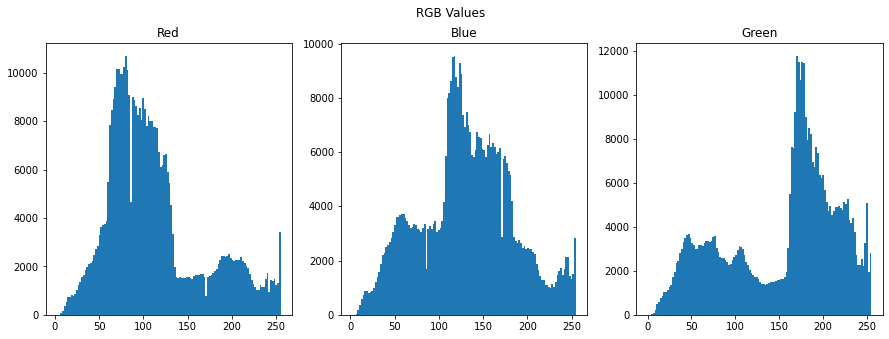

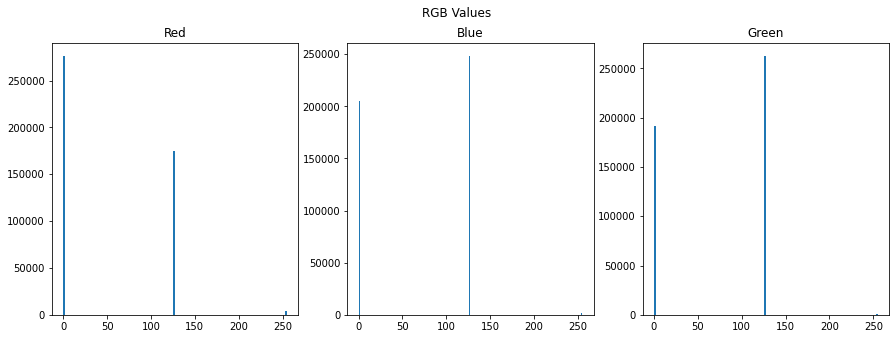

In [5]:
# Plot RGB:
def plot_hist(image_array):
    fig, axes = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle('RGB Values')

    RGB_INDICES_TO_NAME = {
        0: 'Red',
        1: 'Blue',
        2: 'Green'
    }

    for i in range(3):
        axis = axes[i]
        axis.hist(image_array[:,:,i].flatten(),128) 
        axis.set_title(RGB_INDICES_TO_NAME[i])

    fig.show()

plot_hist(im)
plot_hist(im_quot)